# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.


In [ ]:
# Get basic info about the Chicago beach sensors datasets

beach_sensors = pd.read_csv('data/beach_sensors.csv')
print(beach_sensors.head())
print(beach_sensors.info())
print(beach_sensors.shape)
print(beach_sensors.describe(include='all'))
print(beach_sensors.columns)
print(beach_sensors.dtypes)
print(beach_sensors['Measurement Timestamp'])

                  Station Name   Measurement Timestamp  Air Temperature  \
0  63rd Street Weather Station  09/27/2018 10:00:00 AM            16.40   
1  63rd Street Weather Station  09/27/2018 11:00:00 AM            17.10   
2  63rd Street Weather Station  09/27/2018 01:00:00 PM            18.20   
3       Foster Weather Station  09/27/2018 01:00:00 PM            17.89   
4  63rd Street Weather Station  09/27/2018 03:00:00 PM            19.50   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                  12.2        61             0.0            0.0       260.3   
1                  11.5        51             0.0            0.0       260.3   
2                  12.4        51             0.0            0.0       260.3   
3                   NaN        39             NaN            0.0         NaN   
4                  13.0        47             0.0            0.0       260.3   

   Precipitation Type  Wind Direction  Wind Speed  Maximum Wind Spee

In [ ]:
# Convert Measurment Timestamp Column to pd.datetime

beach_sensors['Measurement Timestamp'] = pd.to_datetime(beach_sensors['Measurement Timestamp'])

In [ ]:
# Gather overall information for beach sensors dataset to answer q1_data_info

shape = beach_sensors.shape
colnames = beach_sensors.columns
data_types = beach_sensors.dtypes
min_date = beach_sensors['Measurement Timestamp'].min()
max_date = beach_sensors['Measurement Timestamp'].max()
missing_values = beach_sensors.isnull().sum()

print(f"Shape of the dataset: {shape}")
print(f"Column names: {colnames}")
print(f"Data types:\n{data_types}")
print(f"Date range: {min_date} to {max_date}")
print(f"Missing values per column:\n{missing_values}")

Shape of the dataset: (196313, 18)
Column names: Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')
Data types:
Station Name                           object
Measurement Timestamp          datetime64[ns]
Air Temperature                       float64
Wet Bulb Temperature                  float64
Humidity                                int64
Rain Intensity                        float64
Interval Rain                         float64
Total Rain                            float64
Precipitation Type                    float64
Wind Direction                          int64
Wind Speed                            float64
Maximum Wind Speed           

In [ ]:
# now I compile 'output/q1_data_info.txt'

with open('output/q1_data_info.txt', 'w') as f:
    f.write(f'Dataset Shape: {shape[0]} rows × {shape[1]} columns\n')
    f.write(f'Column Names:\n')
    for col in colnames:
        f.write(f' - {col}\n')
    f.write(f'\nData Types:\n')
    for col, dtype in data_types.items():
        f.write(f' - {col}: {dtype}\n')
    f.write(f'\nDate Range: {min_date} to {max_date}\n')
    f.write(f'\nMissing Values per Column:\n')
    for col, missing in missing_values.items():
        f.write(f' - {col}: {missing} ({missing/len(beach_sensors):.1f})%\n')
    


In [ ]:
# I compile 'output/q1_exploration.csv'

numeric_df = beach_sensors.select_dtypes(include='number')
numeric_df_colnames = numeric_df.columns

missing_values_numeric = numeric_df.isna().sum()

data = {
    'column_name': numeric_df_colnames,
    'mean': [float(numeric_df[col].mean()) for col in numeric_df_colnames],
    'std': [float(numeric_df[col].std()) for col in numeric_df_colnames],
    'min': [float(numeric_df[col].min()) for col in numeric_df_colnames],
    'max': [float(numeric_df[col].max()) for col in numeric_df_colnames],
    'missing_count': [int(missing_values_numeric[col]) for col in numeric_df_colnames]}

print(data)

csv_df = pd.DataFrame(data)
csv_df.to_csv('output/q1_exploration.csv', index=False)

{'column_name': Index(['Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity',
       'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction',
       'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure',
       'Solar Radiation', 'Heading', 'Battery Life'],
      dtype='object'), 'mean': [12.624225073635074, 10.27482096273034, 68.02391588942149, 0.15892693950118802, 0.14236790227850427, 141.48457122443216, 4.267774953059834, 140.80295752191654, 2.918785307137072, 3.556968208931655, 994.3134273348728, 112.34736874277301, 281.9668344881445, 13.163250014008243], 'std': [10.435491250453873, 9.403981662014425, 15.633995713561301, 1.794022816610356, 1.0969230607538099, 190.4590771816808, 15.589548562681943, 122.00747357163634, 5.341879881583158, 5.955099747225225, 10.02922023732468, 842.8080702318339, 142.7717524102073, 1.5446151630769804], 'min': [-29.78, -28.9, 0.0, 0.0, -0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100000.0, 0.0, 0.0], 'max': [37.6, 28.4, 100.0,

/Users/audreysu/p3/lib/python3.10/site-packages/seaborn/relational.py:292: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()


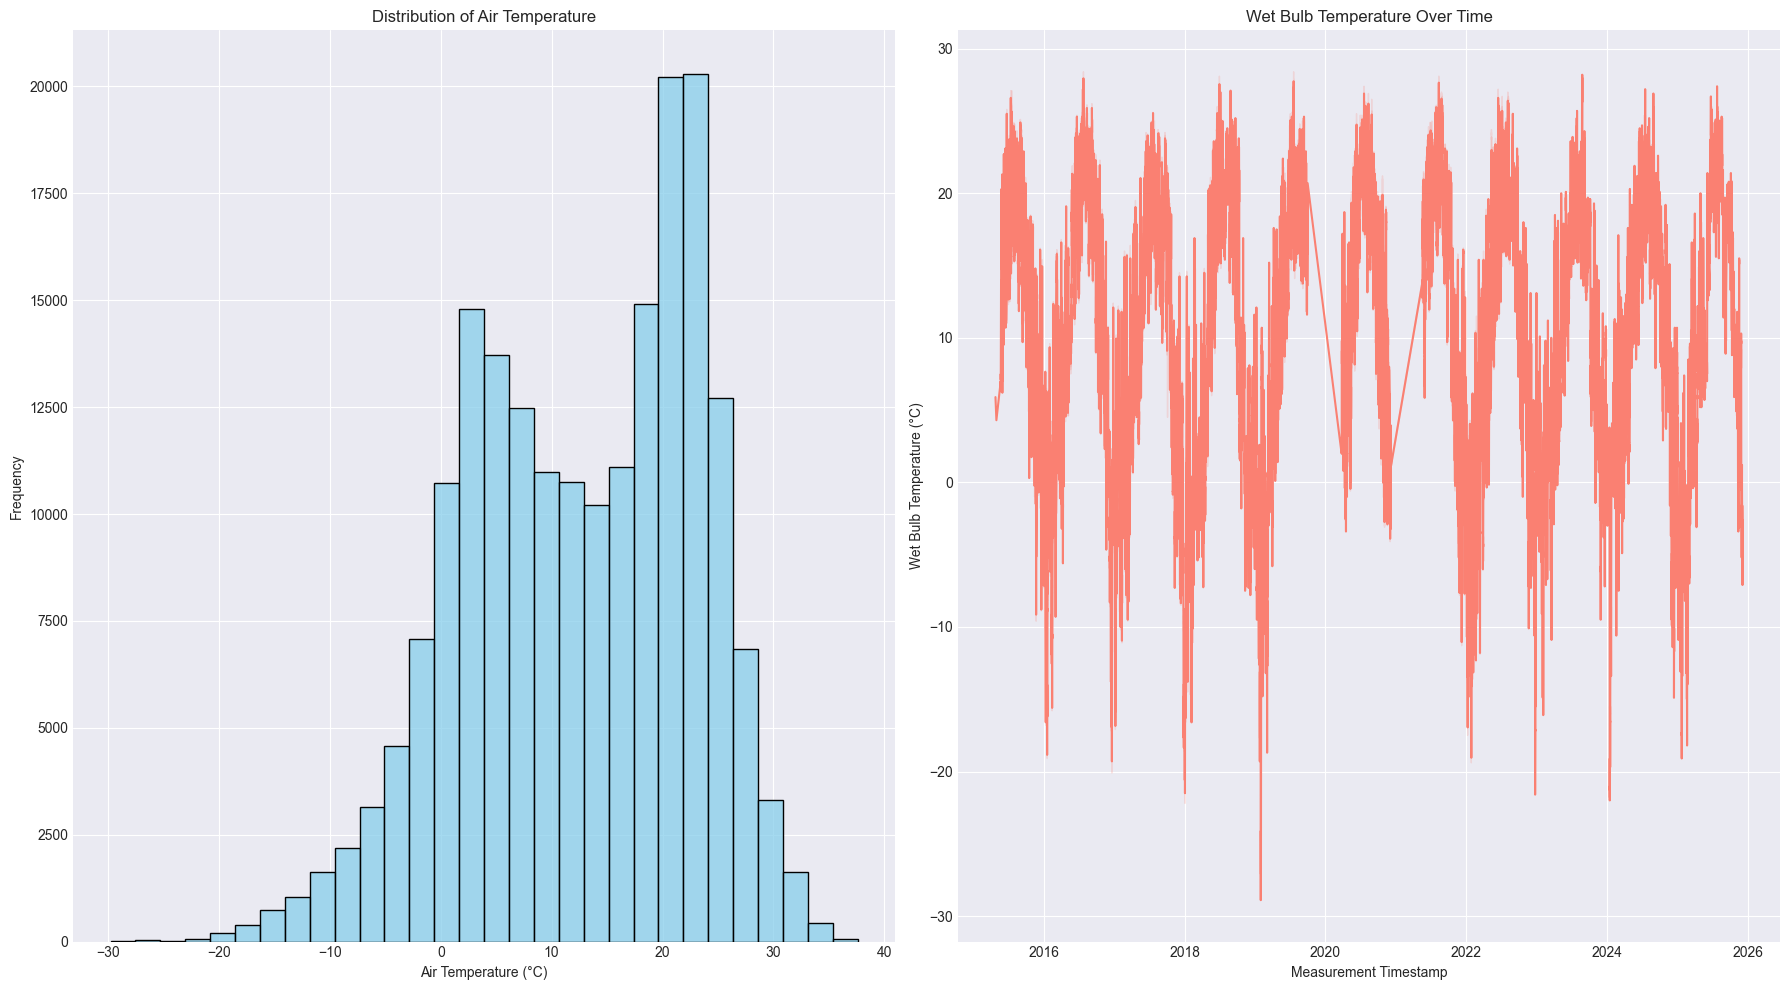

In [ ]:
# I generate q1_visualiations.png

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Histogram of Air Temperature

sns.histplot(beach_sensors['Air Temperature'].dropna(), bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Air Temperature')
axes[0].set_xlabel('Air Temperature (°C)')
axes[0].set_ylabel('Frequency')

# Time Series of Wet Bulb Temperature

sns.lineplot(data=beach_sensors, x='Measurement Timestamp', y='Wet Bulb Temperature', ax=axes[1], color='salmon')
axes[1].set_title('Wet Bulb Temperature Over Time')
axes[1].set_xlabel('Measurement Timestamp')
axes[1].set_ylabel('Wet Bulb Temperature (°C)')
plt.tight_layout()
plt.savefig('output/q1_visualizations.png', dpi = 300)
